```
BEGIN ASSIGNMENT 
init_cell: true 
export_cell: true 
files:
    - d8error.py
    - errorConfig.json
    - triple_vertical.csv
    - btc.csv
    - eth.csv
    - spreads.csv
export_cell:
    pdf: false
    force_save: false
solutions_pdf: true
template_pdf: true
generate:
    points_possible: 62.0
    show_stdout: true
    filtering: true
    pagebreaks: true
    zips: false
```


# Homework 10: Linear Regression

**Helpful Resource:**

- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings**: 

* [The Regression Line](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)
* [Method of Least Squares](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html)
* [Least Squares Regression](https://www.inferentialthinking.com/chapters/15/4/Least_Squares_Regression.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to setup the notebook by importing some helpful libraries. Each time you start your server, you will need to execute this cell again.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!


**Note: This homework has hidden tests on it. That means even though the tests may say 100% passed, it doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

You should start early so that you have time to get help if you're stuck.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from datetime import datetime

## 1. Triple Jump Distances vs. Vertical Jump Heights 

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities. Let's find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the [vertical jump](https://en.wikipedia.org/wiki/Vertical_jump).  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate-level soccer players. Each athlete's distances in both events were measured in centimeters. Run the cell below to load the data.

In [2]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

triple,vertical
383,33
781,71.1
561.62,62.25
624.52,61.33
446.24,40.19
515.3,38.96
449.22,39.69
560.91,46.51
519.12,37.68
595.38,53.48


**Question 1.1.** Create a function `standard_units` that converts the values in the array `data` to standard units. **(5 points)**

```
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 0
 - 0
 - 0
 - 5
```

In [3]:
def standard_units(data):
    return (data - np.mean(data)) / np.std(data) #SOLUTION

In [4]:
# TEST
standard_units([1,2,3,4,5])

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [5]:
# TEST
np.isclose(np.mean(standard_units([1,2,3,4,5])), 0)

True

In [6]:
# TEST
np.isclose(np.std(standard_units([1,2,3,4,5])), 0.9999999999999999)

True

In [7]:
# HIDDEN TEST
standard_units([-3, -2, 1, 0, 1, 2, 3])

array([-1.65988202, -1.15470054,  0.36084392, -0.14433757,  0.36084392,
        0.8660254 ,  1.37120689])

**Question 1.2.** Now, using the `standard_units` function, define the function `correlation` which computes the correlation between `x` and `y`. **(5 points)**

```
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 5
```

In [8]:
def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y)) #SOLUTION

In [9]:
# TEST
np.isclose(correlation([1,2,3], [4,5,6]), 0.9999999999999999)

True

In [10]:
# HIDDEN TEST
np.isclose(correlation([-3, 0, 3], [-3, 0, 3]), 1.0000000000000002)

True

**Question 1.3.** Before running a regression, it's important to see what the data looks like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot, **that includes the regression line**, with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis. **(5 points)**

See the documentation on `scatter` [here](http://data8.org/datascience/_autosummary/datascience.tables.Table.scatter.html#datascience.tables.Table.scatter) for instructions on how to have Python draw the regression line automatically.

*Hint:* The `fit_line` argument may be useful here!

```
BEGIN QUESTION
name: q1_3
manual: true
image: true
```

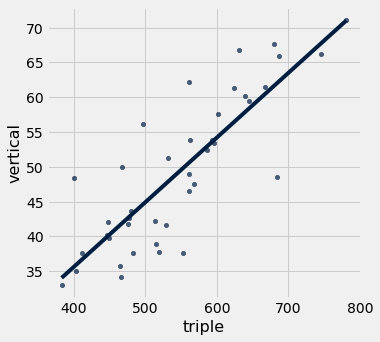

In [11]:
jumps.scatter('triple', 'vertical', fit_line=True) #SOLUTION

**Question 1.4.** Does the correlation coefficient $r$ look closest to 0, .5, or -.5? Explain. **(5 points)**

```
BEGIN QUESTION
name: q1_4
manual: true
```

**SOLUTION:** It definitely looks closest to .5.  The two variables are positively associated, so it's not -.5.  The data roughly follow a line, so the correlation is probably closer to .5 than to 0.

**Question 1.5.** Create a function called `parameter_estimates` that takes in the argument `tbl`, a two-column table where the first column is the x-axis and the second column is the y-axis. It should return an array with three elements: the **(1) correlation coefficient** of the two columns and the **(2) slope** and **(3) intercept** of the regression line that predicts the second column from the first, in original units. **(5 points)**

*Hint:* This is a rare occasion where it’s better to implement the function using column indices instead of column names, in order to be able to call this function on any table. If you need a reminder about how to use column indices to pull out individual columns, please refer to [this](https://www.inferentialthinking.com/chapters/06/Tables.html#accessing-the-data-in-a-column) section of the textbook.

```
BEGIN QUESTION
name: q1_5
manual: false
points:
 - 0
 - 0
 - 0
 - 5
```

In [12]:
def parameter_estimates(tbl):
    # BEGIN SOLUTION
    y_mean = np.mean(tbl.column(1)) 
    y_sd = np.std(tbl.column(1))
    x_mean = np.mean(tbl.column(0))
    x_sd = np.std(tbl.column(0))
    r = correlation(tbl.column(0), tbl.column(1))
    slope = r * (y_sd / x_sd)
    intercept = slope * (-x_mean) + y_mean 
    # END SOLUTION
    return make_array(r, slope, intercept)

parameters = parameter_estimates(jumps) 
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837598 ; slope: 0.09295728160512184 ; intercept: -1.566520972963474


In [13]:
# TEST
len(parameters) == 3

True

In [14]:
# TEST
# Make sure your function is returning an array!
type(parameters) == np.ndarray

True

In [15]:
# TEST 
np.isclose(parameters.item(0), 0.8343076972837598)

True

In [16]:
# HIDDEN TEST
np.allclose(parameters, [0.8343077, 0.09295728, -1.56652097])

True

**Question 1.6.** Now suppose you want to go the other way and predict a triple jump distance given a vertical jump distance. What would the regression parameters of this linear model be? How do they compare to the regression parameters from the model where you were predicting vertical jump distance given a triple jump distance (in Question 1.5)? **(5 points)**

Set `regression_changes` to an array of 3 elements, with each element corresponding to whether or not the corresponding item returned by `parameter_estimates` changes when switching vertical and triple as $x$ and $y$. For example, if $r$ changes, the slope changes, but the intercept wouldn't change, the `regression_changes` would be assigned to `make_array(True, True, False)`.

```
BEGIN QUESTION
name: q1_6
manual: false
points:
 - 0
 - 0
 - 5
```

In [17]:
regression_changes = make_array(False, True, True) # SOLUTION
regression_changes

array([0, 1, 1])

In [18]:
# TEST 
# Make sure regression_changes is a numpy array with 3 items!
len(regression_changes) == 3 and type(regression_changes) == np.ndarray

True

In [19]:
# TEST
regression_changes.item(0) in set([0, 1, False, True])

True

In [20]:
# HIDDEN TEST 
np.all(regression_changes == make_array(False, True, True))

True

**Question 1.7.** Let's use `parameters` (from Question 1.5) to predict what certain athletes' vertical jump heights would be given their triple jump distances. **(5 points)**

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What is the prediction for Edwards' vertical jump using this line?

*Hint:* Make sure to convert from meters to centimeters!

```
BEGIN QUESTION
name: q1_7
manual: false
points:
 - 0
 - 5
```

In [21]:
triple_record_vert_est = parameters.item(1) * 1829 + parameters.item(2) # SOLUTION
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


In [22]:
# TEST
100 <= triple_record_vert_est <= 200

True

In [23]:
# HIDDEN TEST
np.isclose(triple_record_vert_est, 168.452347)

True

**Question 1.8.** Do you think it makes sense to use this line to predict Edwards' vertical jump? **(5 points)**

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data (shown in Question 1.3)? 

```
BEGIN QUESTION
name: q1_8
manual: true
```

**SOLUTION:** No; we have absolutely no information on the triple jump distances in any remote region near 18.29 meters, so it's not smart to make an estimate for it based on this data that is outside our observed range.  In fact, this is around 7 cm higher than the [current world record](http://www.guinnessworldrecords.com/world-records/highest-standing-jump) according to Guinness.  That's not totally implausible, but it seems unlikely.

## 2. Cryptocurrencies

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable cryptocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attached to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$10,859.56$ and one ETH costs $\$424.64.$

For fun, here are the current prices of [Bitcoin](https://www.coinbase.com/price/bitcoin) and [Ethereum](https://www.coinbase.com/price/ethereum)!

**You want to predict the price of ETH at some point in time based on the price of BTC.** Below, we load two [tables](https://www.kaggle.com/jessevent/all-crypto-currencies/data) called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [25]:
btc = Table.read_table('btc.csv')
btc.show(5)

date,open,close,market,day
2015-09-29,239.02,236.69,3505090000,1
2015-09-30,236.64,236.06,3471280000,2
2015-10-01,236,237.55,3462800000,3
2015-10-02,237.26,237.29,3482190000,4
2015-10-03,237.2,238.73,3482100000,5


In [26]:
eth = Table.read_table('eth.csv')
eth.show(5)

date,open,close,market,day
2015-09-29,0.579414,0.661146,42607700,1
2015-09-30,0.661192,0.738644,48636600,2
2015-10-01,0.734307,0.690215,54032300,3
2015-10-02,0.683732,0.678574,50328700,4
2015-10-03,0.678783,0.687171,49981900,5


**Question 2.1.** In the cell below, create an overlaid line plot that visualizes the BTC and ETH open prices as a function of the day. Both BTC and ETH open prices should be plotted on the same graph. **(5 points)**

*Hint*: [Section 7.3](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html#overlaid-line-plots) in the textbook might be helpful!

```
BEGIN QUESTION
name: q2_1
manual: true
image: true
```

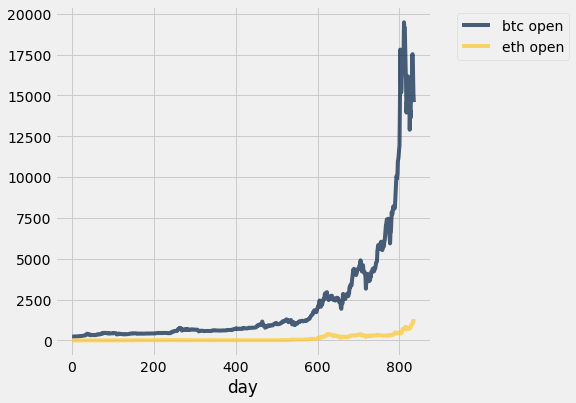

In [27]:
# BEGIN SOLUTION NO PROMPT
btc_only = btc.select('day', 'open').relabeled('open', 'btc open')
both = btc_only.with_column('eth open', eth.column('open'))
both.plot('day')
# END SOLUTION
""" # BEGIN PROMPT
# Create a line plot of btc and eth open prices as a function of time
...
"""; # END PROMPT

**Question 2.2.** Now, calculate the correlation coefficient between the opening prices of BTC and ETH using the `correlation` function you defined earlier. **(5 points)**

```
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 0
 - 5
```

In [28]:
r = correlation(both.column('eth open'), both.column('btc open')) #SOLUTION
r

0.9250325764148278

In [29]:
# TEST
# Correlation is a number between -1 and 1
-1 <= r <= 1

True

In [30]:
# TEST 
# It appears that you implemented std_units, but did so incorrectly
standard_units(np.arange(5)) is None or np.allclose(standard_units(np.arange(5)), [-1.41421356, -0.70710678,  0,  0.70710678,  1.41421356])

True

In [31]:
# HIDDEN TEST
np.isclose(r, 0.92503257641482783)

True

**Question 2.3.** Write a function `eth_predictor` which takes an opening BTC price and predicts the opening price of ETH. Again, it will be helpful to use the function `parameter_estimates` that you defined earlier in this homework. **(5 points)**

*Hint*: Double-check what the `tbl` input to `parameter_estimates` must look like!

*Note:* Make sure that your `eth_predictor` is using least squares linear regression.

```
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 5
```

In [32]:
def eth_predictor(btc_price):
    parameters = parameter_estimates(Table().with_columns("btc", btc.column("open"), "eth", eth.column("open"))) #SOLUTION
    slope = parameters.item(1) #SOLUTION
    intercept = parameters.item(2) #SOLUTION
    return slope * btc_price + intercept #SOLUTION

In [33]:
# TEST 
0 < eth_predictor(10) < 100

True

In [34]:
# HIDDEN TEST
np.allclose(eth_predictor(np.arange(10,15)), [ 2.6421542 ,  2.69252572,  2.74289723,  2.79326875,  2.84364026])

True

**Question 2.4.** Now, using the `eth_predictor` function you just defined, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices. **(5 points)**

*Hint 1:* An example of such a scatter plot is generated can be found [here](https://inferentialthinking.com/chapters/15/2/Regression_Line.html). </a>

*Hint 2:* Think about the table that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present in this table? Also, what should each row represent? Constructing the table will be the main part of this question; once you have this table, generating the scatter plot should be straightforward as usual.

```
BEGIN QUESTION
name: q2_4
manual: true
image: true
```

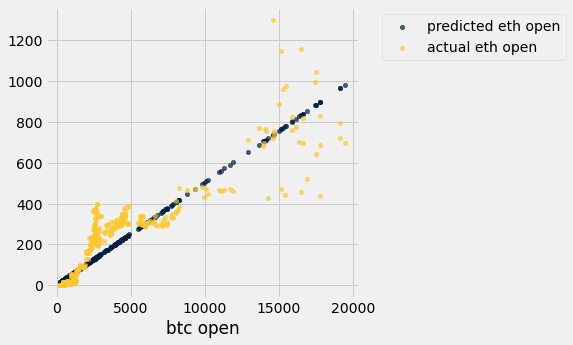

In [35]:
btc_open = btc.select('open') # SOLUTION
eth_pred = btc_open.with_column("predicted eth open", btc.apply(eth_predictor, "open")) # SOLUTION
eth_pred_actual = eth_pred.with_column("actual eth open", eth.column("open")) # SOLUTION
eth_pred_actual.relabeled("open", "btc open").scatter('btc open') # SOLUTION

**Question 2.5.** Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features or characteristics make this model reasonable? If not, what features or characteristics make it unreasonable? **(5 points)**

```
BEGIN QUESTION
name: q2_5
manual: true
```

**SOLUTION:** This is not a great model for this particular data, as the true data are not even close to being linear (we can see the actual ETH open prices may follow a higher-order pattern). We have produced the line of best fit, but that doesn't mean much when the data points that the line is best fit for is a bad set of non-linear trending data; in other words, there will always be a line of best fit for any data, but that does not mean that the data itself is best fit by a linear model.

## 3. Evaluating NBA Game Predictions

#### A Brief Introduction to Sports Betting

In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team", and their opponent is called the "away team".  The winner is the team with more points at the end of the game.

We can summarize what happened in a game by the "**outcome**", defined as the **the away team's score minus the home team's score**:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won. 

In order to facilitate betting on games, analysts at casinos try to predict the outcome of the game. This prediction of the outcome is called the **spread.**


In [37]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


Here's a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

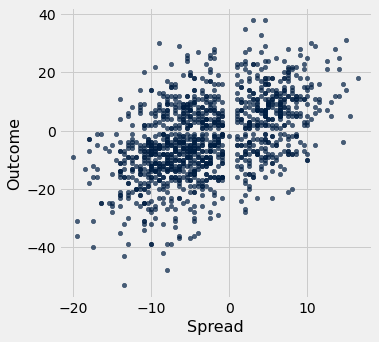

In [38]:
spreads.scatter("Spread", "Outcome")

From the scatter plot, you can see that the spread and outcome are almost never 0, aside from one case of the spread being 0. This is because a game of basketball never ends in a tie. One team has to win, so the outcome can never be 0. The spread is almost never 0 because it's chosen to estimate the outcome.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

**Question 3.1.** Compute the correlation coefficient between outcomes and spreads. **(5 points)**

*Note:* It might be helpful to use the `correlation` function.

```
BEGIN QUESTION
name: q3_1
manual: false
points:
 - 0
 - 5
```

In [39]:
spread_r = correlation(spreads.column("Outcome"), spreads.column("Spread")) #SOLUTION
spread_r

0.49181413688314235

In [40]:
# TEST 
-1 <= spread_r <= 1

True

In [41]:
# HIDDEN TEST 
np.isclose(spread_r, 0.49181413688314235)

True

**Question 3.2.** Among games with a spread between 3.5 and 6.5 (including both 3.5 and 6.5), what was the average outcome? **(5 points)**

```
BEGIN QUESTION
name: q3_2
manual: false
points:
 - 0
 - 5
```

In [42]:
spreads_around_5 = spreads.where("Spread", are.between_or_equal_to(3.5, 6.5)) #SOLUTION
spread_5_outcome_average = np.mean(spreads_around_5.column("Outcome")) #SOLUTION
print("Average outcome for spreads around 5:", spread_5_outcome_average)

Average outcome for spreads around 5: 4.9941176470588236


In [43]:
# TEST 
4 <= spread_5_outcome_average <= 6

True

In [44]:
# HIDDEN TEST 
np.isclose(spread_5_outcome_average, 4.99411764706)

True

**Question 3.3.** Use the function `parameter_estimates` that you defined earlier to compute the least-squares linear regression line that predicts outcomes from spreads, in original units. We have provided a two column table for you in the cell below with the first column representing `Spread` (x) and the second column representing `Outcome` (y), which you should use as an argument to the function. **(5 points)**

```
BEGIN QUESTION
name: q3_3
manual: false
points:
 - 0
 - 0
 - 2
 - 3
```

In [45]:
compute_tbl = spreads.select('Spread', 'Outcome')
estimates = parameter_estimates(compute_tbl) # SOLUTION
spread_slope = estimates.item(1) # SOLUTION
spread_intercept = estimates.item(2) # SOLUTION
print("Slope:", round(spread_slope, 3))
print("Intercept", round(spread_intercept, 3))

Slope: 0.954
Intercept 0.22


In [46]:
# TEST 
0 <= spread_slope < 1

True

In [47]:
# TEST 
spread_intercept > 0

True

In [48]:
# HIDDEN TEST 
np.isclose(spread_slope, 0.95392696822643275)

True

In [49]:
# HIDDEN TEST 
np.isclose(spread_intercept, 0.22024761654565372)

True

**Question 3.4.** Suppose that we create another model that simply predicts the average outcome regardless of the value for spread. Does this new model minimize the least squared error? Why or why not? **(5 points)**

```
BEGIN QUESTION
name: q3_4
manual: true
```

**SOLUTION:** The new predictor is a horizontal **line** that passes through the average value for outcome. Therefore. it does not minimize least squared error, as only the regression line is the unique straight line that minimizes least squared error among all straight lines.

### Fitting a Least-Squares Regression Line

Recall that the least-squares regression line is the unique straight line that minimizes root mean squared error (RMSE) among all possible fit lines. Using this property, we can find the equation of the regression line by finding the pair of slope and intercept values that minimize root mean squared error. 

**Question 3.5.** Define a function called `errors`.  It should take three arguments:
1. a table `tbl` like `spreads` (with the same column names and meanings, but not necessarily the same data)
2. the `slope` of a line (a number)
3. the `intercept` of a line (a number).

It should **return an array of the errors** made when a line with that slope and intercept is used to predict outcome from spread for each game in the given table. **(3 points)**

*Note*: Make sure you are returning an array of the errors, and not the RMSE. 

```
BEGIN QUESTION
name: q3_5
manual: false
points:
 - 0
 - 0
 - 3
```

In [50]:
def errors(tbl, slope, intercept):
    predictions = slope * tbl.column("Spread") + intercept # SOLUTION NO PROMPT
    return tbl.column("Outcome") - predictions # SOLUTION

In [51]:
# TEST
type(errors(spreads, 0, 0).item(0)) in set([float, np.float32, np.float64])

True

In [52]:
# TEST
len(errors(spreads, 0, 0)) == 1230

True

In [53]:
# HIDDEN TEST
np.isclose(np.mean(errors(spreads, 0, 0)), -2.4073170731707316)

True

**Question 3.6.** Using `errors`, compute the errors for the line with slope `0.5` and intercept `25` on the `spreads` dataset. Name that array `outcome_errors`.  Then, make a scatter plot of the errors. **(3 points)**

*Hint:* To make a scatter plot of the errors, plot the error for each outcome in the dataset.  Put the actual spread on the horizontal axis and the outcome error on the vertical axis.

```
BEGIN QUESTION
name: q3_6
manual: false
points:
 - 3
```

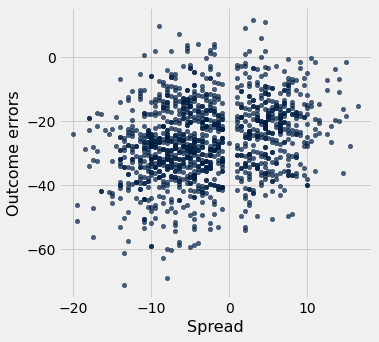

In [54]:
outcome_errors = errors(spreads, 0.5, 25) # SOLUTION
# BEGIN SOLUTION
spreads.with_column("Outcome errors", outcome_errors)\
           .scatter("Spread", "Outcome errors")
# END SOLUTION

In [55]:
# TEST
# If you're not passing this test, double check your errors function!
np.round(outcome_errors.item(0), 2) == -25.25

True

You should find that the errors are almost all negative.  That means our line is not the best fit to our data.  Let's find a better one.

**Question 3.7.** Define a function called `fit_line`.  It should take a table like `spreads` (with the same column names and meanings) as its argument.  It should return an array containing the slope (as the first element) and intercept (as the second element) of the least-squares regression line predicting outcome from spread for that table. **(3 points)**

*Hint*: Define a function `rmse` within `fit_line` that takes a slope and intercept as its arguments. `rmse` will use the table passed into `fit_line` to compute predicted outcomes and then return the root mean squared error between the predicted and actual outcomes. Within `fit_line`, you can call `rmse` the way you would any other function.

If you haven't tried to use the `minimize` [function](http://data8.org/sp22/python-reference.html) yet, now is a great time to practice. Here's an [example from the textbook](https://www.inferentialthinking.com/chapters/15/3/Method_of_Least_Squares.html#numerical-optimization).

```
BEGIN QUESTION
name: q3_7
manual: false
points:
 - 0
 - 0
 - 3
```

In [56]:
# BEGIN SOLUTION NO PROMPT
def fit_line(tbl):
    def rmse(slope, intercept):
        return (np.mean(errors(tbl, slope, intercept)**2)**0.5)
    return minimize(rmse)
# END SOLUTION
""" # BEGIN PROMPT
def fit_line(tbl):
    # Your code may need more than 1 line below here.
    def rmse(..., ...):
        return ... 
    return ... 
"""; # END PROMPT
    
# Here is an example call to your function.  To test your function,
# figure out the right slope and intercept by hand.
example_table = Table().with_columns(
    "Spread", make_array(0, 1),
    "Outcome", make_array(1, 3))
fit_line(example_table)

array([2., 1.])

In [57]:
# TEST
type(fit_line(example_table)) == np.ndarray

True

In [58]:
# TEST
type(fit_line(example_table).item(0)) in set([float, np.float32, np.float64])

True

In [59]:
# HIDDEN TEST
np.isclose(fit_line(example_table).item(0), 2) and np.isclose(fit_line(example_table).item(1), 1)

True

**Question 3.8.** Use `fit_line` to fit a line to `spreads`, and assign the output to `best_line`. Assign the first and second elements in `best_line` to `best_line_slope` and `best_line_intercept`, respectively.

Then, set `new_errors` to the array of errors that we get by calling `errors` with our new line. The provided code will graph the corresponding residual plot with a best fit line. **(3 points)**

*Hint:* Make sure that the residual plot makes sense. What qualities should the best fit line of a residual plot have?

```
BEGIN QUESTION
name: q3_8
manual: false
points:
 - 0
 - 1
 - 1
 - 1
```

'Slope: 0.953816 | Intercept: 0.217835'

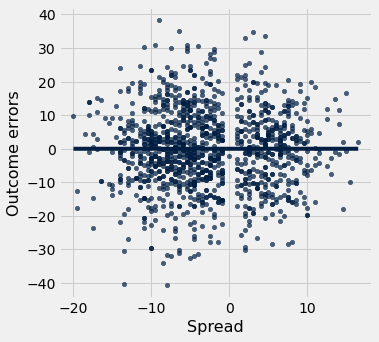

In [60]:
best_line = fit_line(spreads) #SOLUTION
best_line_slope = best_line.item(0) #SOLUTION
best_line_intercept = best_line.item(1) #SOLUTION

new_errors = errors(spreads, best_line_slope, best_line_intercept) #SOLUTION

# This code displays the residual plot, given your values for the best_line_slope and best_line_intercept
Table().with_columns("Spread", 
                    spreads.column("Spread"), 
                    "Outcome errors", 
                    new_errors
                   ).scatter("Spread", "Outcome errors", fit_line=True)

# This just prints your slope and intercept
"Slope: {:g} | Intercept: {:g}".format(best_line_slope, best_line_intercept)

In [61]:
# TEST
len(new_errors) == 1230

True

In [62]:
# HIDDEN TEST
int(round(best_line_slope, 1)) == 1

True

In [63]:
# HIDDEN TEST
round(best_line_intercept, 1) == 0.2

True

In [64]:
# HIDDEN TEST
round(new_errors[10], 1) == 17.1

True

**Question 3.9.** The slope and intercept pair you found in Question 3.8 should be very similar to the values that you found in Question 3.3. Why were we able to minimize RMSE to find the same slope and intercept from the previous formulas? **(3 points)**

```
BEGIN QUESTION
name: q3_9
manual: true
```

**SOLUTION:** The regression line is the unique straight line (in other words, the unique slope/intercept pair) that minimizes RMSE. Therefore, we can also find the regression line by finding the slope and intercept values that minimize RMSE.

You're done with Homework 10!  

**Important submission steps:** 
1. Run the tests and verify that they all pass.
2. Choose **Save Notebook** from the **File** menu, then **run the final cell**. 
3. Click the link to download the zip file.
4. Then submit the zip file to the corresponding assignment according to your instructor's directions. 

**It is your responsibility to make sure your work is saved before running the last cell.**